<a href="https://colab.research.google.com/github/shumshersubashgautam/QuantumMLEDXSolution-Colab/blob/master/2_0_Measurements_MixedStates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Ranlot/edX---Quantum-Machine-Learning.git

Cloning into 'edX---Quantum-Machine-Learning'...
remote: Enumerating objects: 112, done.
remote: Total 112 (delta 0), reused 0 (delta 0), pack-reused 112
Receiving objects: 100% (112/112), 75.45 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [2]:
cd /content/edX---Quantum-Machine-Learning

/content/edX---Quantum-Machine-Learning


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 102kB 3.8MB/s 
     |████████████████████████████████| 163kB 15.4MB/s 
     |████████████████████████████████| 430kB 75.7MB/s 
     |████████████████████████████████| 15.9MB 54.5MB/s 
     |████████████████████████████████| 2.4MB 42.5MB/s 
     |████████████████████████████████| 808kB 41.0MB/s 
     |████████████████████████████████| 81kB 12.8MB/s 
     |████████████████████████████████| 2.8MB 46.1MB/s 
     |████████████████████████████████| 122kB 59.8MB/s 
     |████████████████████████████████| 768kB 67.2MB/s 
     |████████████████████████████████| 112kB 68.3MB/s 
     |████████████████████████████████| 184kB 60.1MB/s 
     |████████████████████████████████| 133kB 66.2MB/s 
     |████████████████████████████████| 92kB 14.4MB/s 
     |████████████████████████████████| 133kB 66.0MB/s 
     |████████████████████████████████| 952kB 54.3MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 12.9MB 17.4M

In [5]:
!pip install qiskit

     |████████████████████████████████| 1.6MB 4.8MB/s 
     |████████████████████████████████| 17.3MB 25.0MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 983kB 44.6MB/s 
  Using cached https://files.pythonhosted.org/packages/a3/58/35da89ee790598a0700ea49b2a66594140f44dec458c07e8e3d4979137fc/ply-3.11-py2.py3-none-any.whl
     |████████████████████████████████| 5.3MB 48.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 21.7MB 400kB/s 
     |████████████████████████████████| 563kB 51.7MB/s 
     |████████████████████████████████| 2.3MB 41.0MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.13.0-cp36-none-any.whl size=1399 sha256=8cce82de29a198a72bd8ed833be048ca5bbd474981

In [0]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer
from qiskit.tools.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
backend_statevector = BasicAer.get_backend('statevector_simulator')

q, c = QuantumRegister(1), ClassicalRegister(1)

In [31]:
zero_ket = np.array([[1], [0]])
print("|0> ket (column vector):\n", zero_ket)
print("\n<0| bra (row vector):\n", zero_ket.T.conj())

|0> ket (column vector):
 [[1]
 [0]]

<0| bra (row vector):
 [[1 0]]


In [32]:
zero_bra = zero_ket.T.conj()

normZero = zero_bra.dot(zero_ket)
print('<0| bra (row vector):\n%s\n\nNorm <0|0> = %f' % (zero_bra, normZero))

<0| bra (row vector):
[[1 0]]

Norm <0|0> = 1.000000


In [33]:
one_ket = np.array([[0], [1]])
one_bra = one_ket.T.conj()


zero_bra.dot(one_ket)

array([[0]])

In [34]:
π0 = zero_ket.dot(zero_bra)
π0

array([[1, 0],
       [0, 0]])

In [35]:
øKet = np.array([[1], [1]]) / np.sqrt(2)

øBra = øKet.T.conj()

prob0 = øBra.dot(π0.dot(øKet))
prob0

array([[0.5]])

In [37]:
π0.dot(øKet) / np.sqrt(prob0)

array([[1.],
       [0.]])

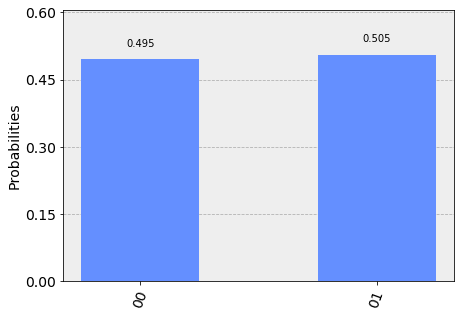

In [38]:
q, c = QuantumRegister(2), ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q, c)
job = execute(circuit, backend, shots=1000)
plot_histogram(job.result().get_counts(circuit))

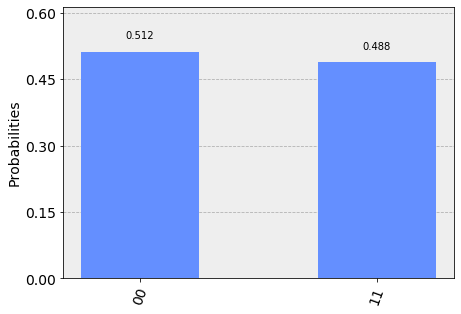

In [39]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q, c)
job = execute(circuit, backend, shots=1000)
plot_histogram(job.result().get_counts(circuit))

In [40]:
øKet = np.array([[1], [1]]) / np.sqrt(2)
øBra = øKet.T.conj()

ørho = øKet.dot(øBra)

print("Density matrix of the equal superposition")
print(ørho)

prob0 = np.trace(π0.dot(ørho))
prob0

Density matrix of the equal superposition
[[0.5 0.5]
 [0.5 0.5]]


0.4999999999999999

In [41]:
π0.dot(ørho).dot(π0) / prob0

array([[1., 0.],
       [0., 0.]])

In [42]:
zeroRho = zero_ket.dot(zero_bra)
oneRho = one_ket.dot(one_bra)

print('density matrix of zero state\n', zeroRho)
print('\ndensity matrix of one state\n', oneRho)

mixedRho = 0.5*(zeroRho + oneRho)
print("\nDensity matrix of the equally mixed state of |0><0| and |1><1|\n", mixedRho)

#print((zero_ket.dot(zero_ket.T.conj())+one_ket.dot(one_ket.T.conj()))/2)

density matrix of zero state
 [[1 0]
 [0 0]]

density matrix of one state
 [[0 0]
 [0 1]]

Density matrix of the equally mixed state of |0><0| and |1><1|
 [[0.5 0. ]
 [0.  0.5]]
